# 1. Install Dependencies and Setup

In [27]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
  Using cached matplotlib-3.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached protobuf-4.25.4-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached packaging-24.1-py3-none-any.whl (53 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached tensorboard-2.17.0-py3-none-any.whl (5.5 MB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x

In [43]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [46]:
import cv2
import imghdr

In [47]:
data_dir = 'data' 

In [48]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [49]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [50]:
import numpy as np
from matplotlib import pyplot as plt

In [51]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 155 files belonging to 2 classes.


In [52]:
data_iterator = data.as_numpy_iterator()

In [53]:
batch = data_iterator.next()

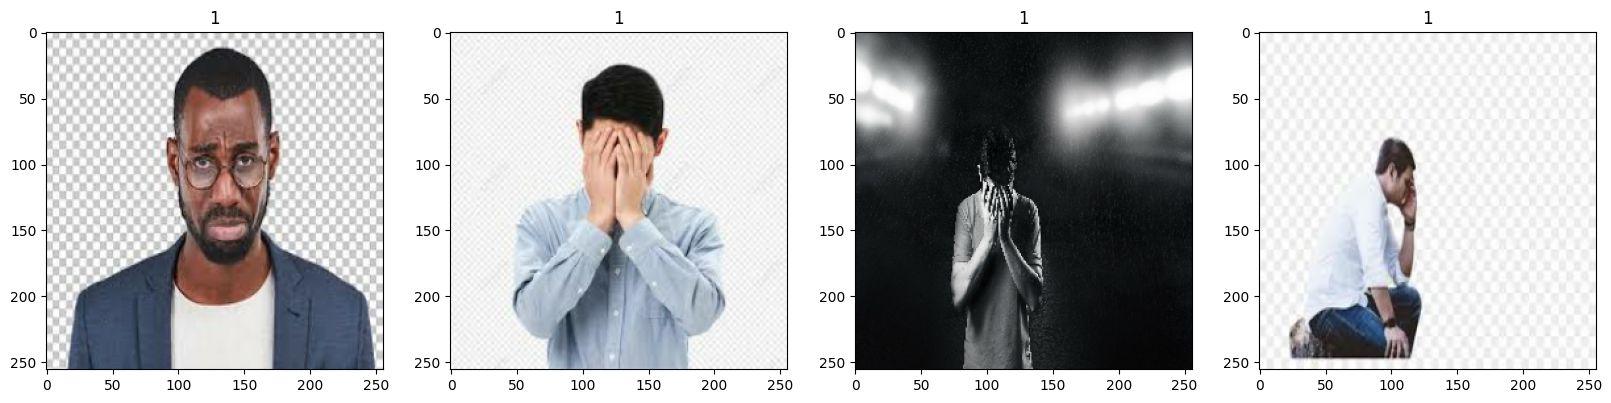

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [55]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
data.as_numpy_iterator().next()

(array([[[[0.93602943, 0.9433824 , 0.9401961 ],
          [0.99338233, 0.9848039 , 0.9977941 ],
          [0.96642154, 0.9637255 , 0.99509805],
          ...,
          [0.9973039 , 0.9852941 , 0.9867647 ],
          [0.9906863 , 0.9906863 , 0.9906863 ],
          [0.9968137 , 0.9970588 , 0.98112744]],
 
         [[0.97622216, 0.98334   , 0.9799187 ],
          [0.9926772 , 0.9840988 , 0.9984993 ],
          [0.9753533 , 0.9688965 , 0.99979895],
          ...,
          [0.97709006, 0.9615545 , 0.9653756 ],
          [0.96765184, 0.96765184, 0.9690621 ],
          [0.99869406, 0.99517846, 0.9799522 ]],
 
         [[0.98730326, 0.98367894, 0.99531823],
          [0.68255687, 0.6600495 , 0.71218693],
          [0.6998966 , 0.6871137 , 0.73923194],
          ...,
          [0.7933225 , 0.77398276, 0.7888648 ],
          [0.7369533 , 0.7362683 , 0.7457309 ],
          [0.99306595, 0.9893895 , 0.9815004 ]],
 
         ...,
 
         [[0.99354225, 0.9977381 , 0.98224473],
          [0.89322

# 5. Split Data

In [57]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [58]:
train_size

3

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [60]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [221]:
logdir='logs'

In [222]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [223]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-08-04 23:54:12.683835: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2024-08-04 23:54:13.078433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 4s - loss: 0.7175 - accuracy: 0.3750

2024-08-04 23:54:13.313867: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


2/3 [===================>..........] - ETA: 0s - loss: 0.8534 - accuracy: 0.5156

2024-08-04 23:54:13.666048: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2024-08-04 23:54:13.860988: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


3/3 [==============================] - 4s 1s/step - loss: 0.7916 - accuracy: 0.5625 - val_loss: 0.6777 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 3s 967ms/step - loss: 0.6694 - accuracy: 0.6250 - val_loss: 0.5724 - val_accuracy: 0.7188
Epoch 3/20
3/3 [==============================] - 3s 919ms/step - loss: 0.6351 - accuracy: 0.7188 - val_loss: 0.5081 - val_accuracy: 0.7188
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.4990 - accuracy: 0.8125 - val_loss: 0.7109 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 3s 970ms/step - loss: 0.4053 - accuracy: 0.8229 - val_loss: 0.3526 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 3s 936ms/step - loss: 0.3470 - accuracy: 0.9062 - val_loss: 0.3840 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 3s 993ms/step - loss: 0.3706 - accuracy: 0.8750 - val_loss: 0.2723 - val_accuracy: 0.9062
Epoch 8/20
3/3 [=====================

# 8. Plot Performance

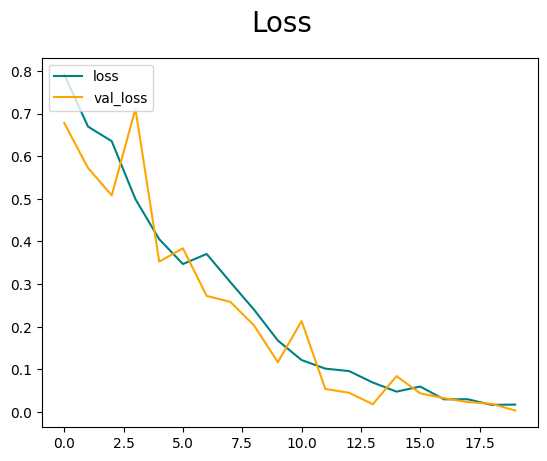

In [224]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

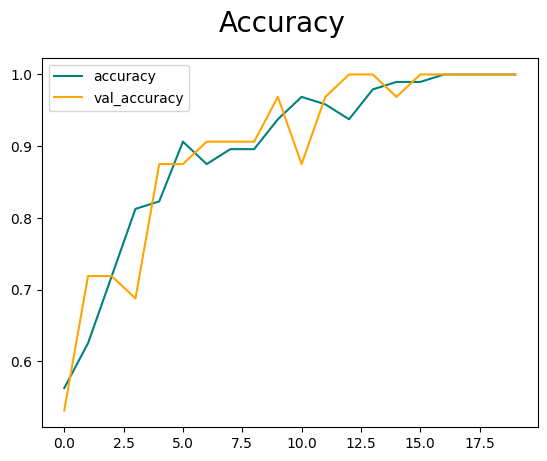

In [225]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [226]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [227]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [228]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [229]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [230]:
import cv2

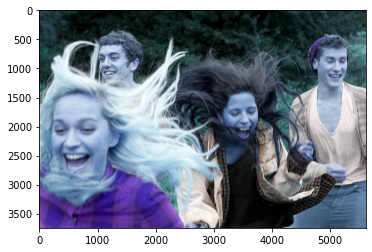

In [39]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

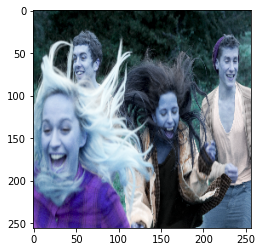

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [42]:
yhat

array([[0.01972741]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)